**Title : Credit Card Predictive Analysis**



Course Title : BIG DATA FRAMEWORKS

Course Code : CSE3120

Slot : G2

In [ ]:
!apt-get update
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,084 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages

In [ ]:
# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
# Unzip the file
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.1-bin-hadoop3.2'

In [ ]:
import findspark
findspark.init()

In [ ]:
# Check the location for Spark
findspark.find()

'/content/spark-3.2.1-bin-hadoop3.2'

In [ ]:
import pyspark
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [ ]:
# Import a Spark function from library
# Test if Spark is installed successfully by importing a Spark library.
from pyspark.sql.functions import col

In [ ]:
from pyspark import SparkConf
from pyspark.context import SparkContext
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
data = sc.textFile("application_record.csv")

In [ ]:
data.count()

438558

In [ ]:
df = data.map(lambda line: line.split(","))
df.top(2)


[['ID',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'FLAG_MOBIL',
  'FLAG_WORK_PHONE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'OCCUPATION_TYPE',
  'CNT_FAM_MEMBERS',
  'STATUS'],
 ['7999952',
  'F',
  'N',
  'Y',
  '1',
  '157500',
  'State servant',
  'Higher education',
  'Married',
  'House / apartment',
  '-15859',
  '-3679',
  '1',
  '0',
  '0',
  '0',
  'Core staff',
  '3',
  '7']]

In [ ]:
#count number of genders
num_genders = df.map(lambda fields:
fields[1]).distinct().count()
num_genders

3

In [ ]:
#count number of Occupations
num_occupations = df.map(lambda fields:
fields[16]).distinct().count()
num_occupations

20

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
count_by_occupation = df.map(lambda fields: (fields[16], 1)).reduceByKey(lambda x, y: x + y).collect()
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])

In [ ]:
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

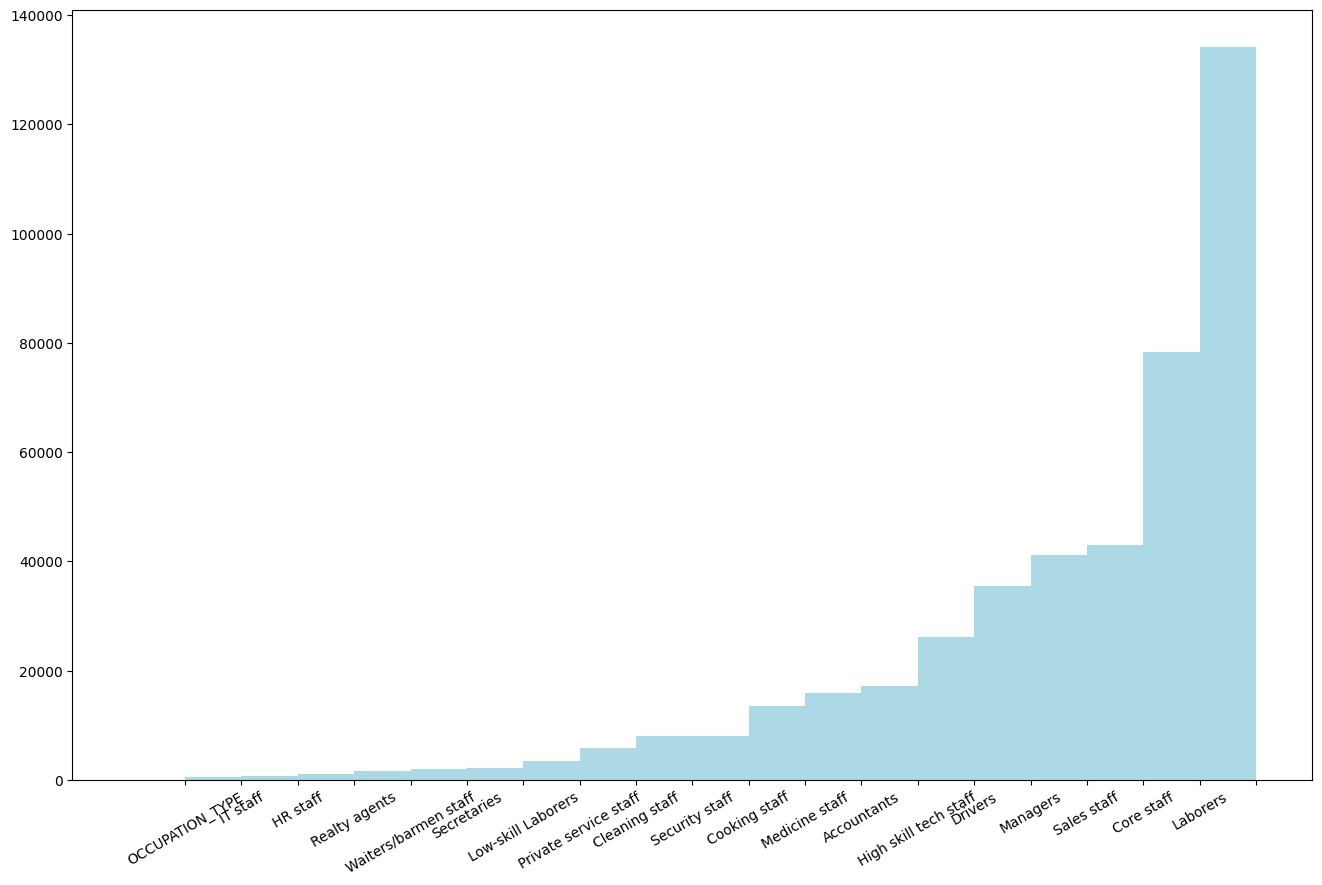

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)
plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

In [ ]:
count_by_occupation2 = df.map(lambda fields: fields[16]).countByValue()
print (dict(count_by_occupation2))

{'OCCUPATION_TYPE': 1, '': 134203, 'Security staff': 7993, 'Sales staff': 41098, 'Accountants': 15985, 'Laborers': 78240, 'Managers': 35487, 'Drivers': 26090, 'Core staff': 43007, 'High skill tech staff': 17289, 'Cleaning staff': 5845, 'Private service staff': 3456, 'Cooking staff': 8076, 'Low-skill Laborers': 2140, 'Medicine staff': 13520, 'Secretaries': 2044, 'Waiters/barmen staff': 1665, 'HR staff': 774, 'Realty agents': 1041, 'IT staff': 604}


# **USING PYSPARK**

In [ ]:
data1 = sc.textFile("/content/application_record.csv")

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-credit').getOrCreate()

In [ ]:
df = spark.read.csv('/content/application_record.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: integer (nullable = true)
 |-- STATUS: integer (nullable = true)



In [ ]:
null_spark = SparkSession.builder.appName('Handling Missing values using PySpark').getOrCreate()
null_spark

In [ ]:
df_null_pyspark = null_spark.read.csv('/content/application_record.csv', header = True, inferSchema = True)
df_null_pyspark

DataFrame[ID: int, CODE_GENDER: string, FLAG_OWN_CAR: string, FLAG_OWN_REALTY: string, CNT_CHILDREN: int, AMT_INCOME_TOTAL: double, NAME_INCOME_TYPE: string, NAME_EDUCATION_TYPE: string, NAME_FAMILY_STATUS: string, NAME_HOUSING_TYPE: string, DAYS_BIRTH: int, DAYS_EMPLOYED: int, FLAG_MOBIL: int, FLAG_WORK_PHONE: int, FLAG_PHONE: int, FLAG_EMAIL: int, OCCUPATION_TYPE: string, CNT_FAM_MEMBERS: int, STATUS: int]

In [ ]:
df_null_pyspark.na.drop()

DataFrame[ID: int, CODE_GENDER: string, FLAG_OWN_CAR: string, FLAG_OWN_REALTY: string, CNT_CHILDREN: int, AMT_INCOME_TOTAL: double, NAME_INCOME_TYPE: string, NAME_EDUCATION_TYPE: string, NAME_FAMILY_STATUS: string, NAME_HOUSING_TYPE: string, DAYS_BIRTH: int, DAYS_EMPLOYED: int, FLAG_MOBIL: int, FLAG_WORK_PHONE: int, FLAG_PHONE: int, FLAG_EMAIL: int, OCCUPATION_TYPE: string, CNT_FAM_MEMBERS: int, STATUS: int]

In [ ]:
df_null_pyspark.count()

438557

**EDA PART**

In [ ]:
numeric_features = [t[0] for t in df_null_pyspark.dtypes ]
df_null_pyspark.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,438557,6022176.269841776,571637.0232571021,5008804,7999952
CODE_GENDER,438557,None,None,F,M
FLAG_OWN_CAR,438557,None,None,N,Y
FLAG_OWN_REALTY,438557,None,None,N,Y
CNT_CHILDREN,438557,0.42739028222101116,0.7248822135521438,0,19
AMT_INCOME_TOTAL,438557,187524.2860095039,110086.8530662298,26100.0,6750000.0
NAME_INCOME_TYPE,438557,None,None,Commercial associate,Working
NAME_EDUCATION_TYPE,438557,None,None,Academic degree,Secondary / secondary special
NAME_FAMILY_STATUS,438557,None,None,Civil marriage,Widow


In [ ]:
# import packages
from pyspark.ml.feature import StringIndexer, OneHotEncoder
# conversion
indexer = StringIndexer(inputCol='CODE_GENDER', outputCol='CODE_GENDER1').fit(df_null_pyspark)
indexed_df = indexer.transform(df_null_pyspark)
indexed_df.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------+------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|STATUS|CODE_GENDER1|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------+------------+
|5008804|          M|           Y|              Y|           0|        427500.0|             Working|    Higher education|      Civil ma

In [ ]:
indexer = StringIndexer(inputCol='FLAG_OWN_CAR', outputCol='FLAG_OWN_CAR1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
indexed_df.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------+------------+-------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|STATUS|CODE_GENDER1|FLAG_OWN_CAR1|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------+------------+-------------+
|5008804|          M|           Y|              Y|           0|        427500.0|             W

In [ ]:
indexer = StringIndexer(inputCol='FLAG_OWN_REALTY', outputCol='FLAG_OWN_REALTY1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
indexed_df.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------+------------+-------------+----------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|STATUS|CODE_GENDER1|FLAG_OWN_CAR1|FLAG_OWN_REALTY1|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------+------------+-------------+----------------+
|5008804|          M|           Y|         

In [ ]:
indexer = StringIndexer(inputCol='CNT_CHILDREN', outputCol='CNT_CHILDREN1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
#indexed_df.show()

In [ ]:
indexer = StringIndexer(inputCol='NAME_INCOME_TYPE', outputCol='NAME_INCOME_TYPE1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
#indexed_df.show()

In [ ]:
indexer = StringIndexer(inputCol='NAME_EDUCATION_TYPE', outputCol='NAME_EDUCATION_TYPE1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
#indexed_df.show()

In [ ]:
indexer = StringIndexer(inputCol='NAME_FAMILY_STATUS', outputCol='NAME_FAMILY_STATUS1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
#indexed_df.show()

In [ ]:
indexer = StringIndexer(inputCol='NAME_HOUSING_TYPE', outputCol='NAME_HOUSING_TYPE1').fit(indexed_df)
indexed_df = indexer.transform(indexed_df)
#indexed_df.show()

In [ ]:
indexed_df  = indexed_df.drop('CODE_GENDER')

In [ ]:
indexed_df  = indexed_df.drop('FLAG_OWN_CAR')

In [ ]:
indexed_df  = indexed_df.drop('FLAG_OWN_REALTY')

In [ ]:
indexed_df  = indexed_df.drop('CNT_CHILDREN')

In [ ]:
indexed_df  = indexed_df.drop('NAME_INCOME_TYPE')

In [ ]:
indexed_df = indexed_df.drop('NAME_EDUCATION_TYPE')

In [ ]:
indexed_df  = indexed_df.drop('NAME_FAMILY_STATUS')

In [ ]:
indexed_df  = indexed_df.drop('NAME_HOUSING_TYPE')

In [ ]:
indexed_df  = indexed_df.drop('OCCUPATION_TYPE')

In [ ]:
indexed_df

DataFrame[ID: int, AMT_INCOME_TOTAL: double, DAYS_BIRTH: int, DAYS_EMPLOYED: int, FLAG_MOBIL: int, FLAG_WORK_PHONE: int, FLAG_PHONE: int, FLAG_EMAIL: int, CNT_FAM_MEMBERS: int, STATUS: int, CODE_GENDER1: double, FLAG_OWN_CAR1: double, FLAG_OWN_REALTY1: double, CNT_CHILDREN1: double, NAME_INCOME_TYPE1: double, NAME_EDUCATION_TYPE1: double, NAME_FAMILY_STATUS1: double, NAME_HOUSING_TYPE1: double]

In [ ]:
indexed_df.show()

+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+
|     ID|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|CNT_FAM_MEMBERS|STATUS|CODE_GENDER1|FLAG_OWN_CAR1|FLAG_OWN_REALTY1|CNT_CHILDREN1|NAME_INCOME_TYPE1|NAME_EDUCATION_TYPE1|NAME_FAMILY_STATUS1|NAME_HOUSING_TYPE1|
+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+
|5008804|        427500.0|    -12005|        -4542|         1|              1|         0|         0|              2|     6|         1.0|          1.0|             0.0|          0.0|              0.0|                 1.0|

**EDA PART USING THE PYSPARK**

In [ ]:
# Count the number of rows using map-reduce
num_rows = indexed_df.rdd.map(lambda row: 1).reduce(lambda a, b: a + b)

# Get the column names
column_names = indexed_df.columns

# Count the number of columns
num_columns = len(column_names)

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 438557
Number of columns: 18


In [ ]:
# Count the total number of customers
total_customers = indexed_df.rdd.map(lambda row: 1).reduce(lambda a, b: a + b)

# Calculate the average data
total_sum = indexed_df.rdd.map(lambda row: row['STATUS']).reduce(lambda a, b: a + b)
average_data = total_sum / total_customers

# Find the maximum and minimum status
max_status = indexed_df.rdd.map(lambda row: row['STATUS']).reduce(lambda a, b: max(a, b))
min_status = indexed_df.rdd.map(lambda row: row['STATUS']).reduce(lambda a, b: min(a, b))

# Print the results
print("Total number of customers data:", total_customers)
print("Average of the Status:", average_data)
print("Maximum status:", max_status)
print("Minimum status:", min_status)

indexed_df.show(5)

Total number of customers data: 438557
Average of the Status: 4.178779497305937
Maximum status: 7
Minimum status: 0
+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+
|     ID|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|CNT_FAM_MEMBERS|STATUS|CODE_GENDER1|FLAG_OWN_CAR1|FLAG_OWN_REALTY1|CNT_CHILDREN1|NAME_INCOME_TYPE1|NAME_EDUCATION_TYPE1|NAME_FAMILY_STATUS1|NAME_HOUSING_TYPE1|
+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+
|5008804|        427500.0|    -12005|        -4542|         1|              1|         0|         0|    

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt


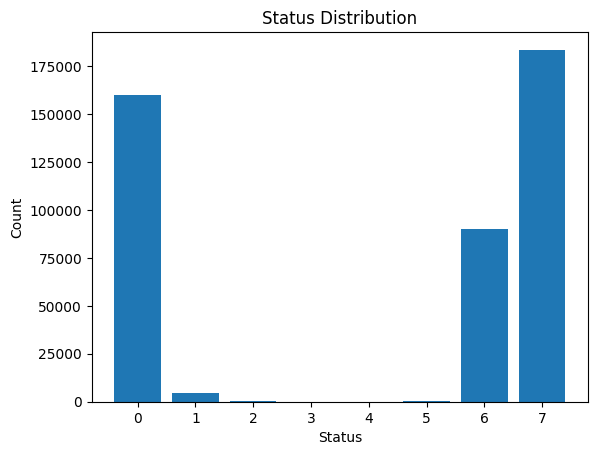

In [ ]:
#Count the frequency of each rating
Status_counts = indexed_df.rdd.map(lambda row: (row['STATUS'], 1)).reduceByKey(lambda a, b: a + b).collect()

# Extract the status values and their corresponding counts
Status = [STATUS[0] for STATUS in Status_counts]
counts = [STATUS[1] for STATUS in Status_counts]

# Visualize the Status distribution
plt.bar(Status, counts)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Distribution')
plt.show()

education level

1...Secondary / secondary special
27%

0..Higher education
69%


2..Other (19214)
4%

In [ ]:
# Map each education type to a count of purchases
education_type = indexed_df.rdd.map(lambda row: (row['NAME_EDUCATION_TYPE1'], 1)).reduceByKey(lambda a, b: a + b)

# Find the customer in the education field who took maximum loan
most_education_user = education_type.max(lambda x: x[1])

# Print the result
print("For which education type people take loan :", most_education_user[0])
print("Number of people:", most_education_user[1])

For which education type people take loan : 0.0
Number of people: 301821


In [ ]:

salary_amt = indexed_df.rdd.map(lambda row: (row['AMT_INCOME_TOTAL'], 1)).reduceByKey(lambda a, b: a + b)

#minimum salary for the loan
mini_salary = salary_amt.max(lambda x: x[1])

# Print the result
print("For which education type people take loan :", mini_salary[0])
print("Number of people:", mini_salary[1])

For which education type people take loan : 135000.0
Number of people: 46879


In [ ]:
import pandas as pd
pd.DataFrame(indexed_df.take(110), columns=indexed_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
ID,5008804.0,5008805.0,5008806.0,5008808.0,5008809.0,5008810.0,5008811.0,5008812.0,5008813.0,5008814.0,...,5008910.0,5008911.0,5008912.0,5008913.0,5008914.0,5008915.0,5008916.0,5008917.0,5008918.0,5008919.0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0,270000.0,270000.0,283500.0,283500.0,283500.0,...,297000.0,297000.0,297000.0,297000.0,297000.0,297000.0,297000.0,297000.0,297000.0,297000.0
DAYS_BIRTH,-12005.0,-12005.0,-21474.0,-19110.0,-19110.0,-19110.0,-19110.0,-22464.0,-22464.0,-22464.0,...,-15519.0,-15519.0,-15519.0,-15519.0,-15519.0,-15519.0,-15519.0,-15519.0,-15519.0,-15519.0
DAYS_EMPLOYED,-4542.0,-4542.0,-1134.0,-3051.0,-3051.0,-3051.0,-3051.0,365243.0,365243.0,365243.0,...,-3234.0,-3234.0,-3234.0,-3234.0,-3234.0,-3234.0,-3234.0,-3234.0,-3234.0,-3234.0
FLAG_MOBIL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FLAG_PHONE,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FLAG_EMAIL,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CNT_FAM_MEMBERS,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
STATUS,6.0,0.0,0.0,0.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


**K Means**

In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'STATUS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1'],outputCol="Features")
output=featureassembler.transform(indexed_df)

In [ ]:
output.show(2)

+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+--------------------+
|     ID|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|CNT_FAM_MEMBERS|STATUS|CODE_GENDER1|FLAG_OWN_CAR1|FLAG_OWN_REALTY1|CNT_CHILDREN1|NAME_INCOME_TYPE1|NAME_EDUCATION_TYPE1|NAME_FAMILY_STATUS1|NAME_HOUSING_TYPE1|            Features|
+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+--------------------+
|5008804|        427500.0|    -12005|        -4542|         1|              1|         0|         0|              2|     6|         1.0|          1.0|       

In [ ]:
indexed_df.groupBy("Status").count().show()

+------+------+
|Status| count|
+------+------+
|     1|  4321|
|     6| 89967|
|     3|   105|
|     5|   508|
|     4|    74|
|     7|183537|
|     2|   300|
|     0|159745|
+------+------+



In [ ]:
#Importing the model
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol = "Features" , k=8)

In [ ]:
model = kmeans.fit(output)

In [ ]:
model

KMeansModel: uid=KMeans_86befb948ca8, k=8, distanceMeasure=euclidean, numFeatures=18

In [ ]:
model.transform(output).groupBy("Prediction").count().show()

+----------+------+
|Prediction| count|
+----------+------+
|         1| 96761|
|         6| 15666|
|         3| 15900|
|         5|106811|
|         4| 19776|
|         2|149067|
|         0| 22051|
|         7| 12525|
+----------+------+



In [ ]:
Prediction = model.transform(output)

In [ ]:
Prediction.show(10)

+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+--------------------+----------+
|     ID|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|CNT_FAM_MEMBERS|STATUS|CODE_GENDER1|FLAG_OWN_CAR1|FLAG_OWN_REALTY1|CNT_CHILDREN1|NAME_INCOME_TYPE1|NAME_EDUCATION_TYPE1|NAME_FAMILY_STATUS1|NAME_HOUSING_TYPE1|            Features|prediction|
+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+--------------------+----------+
|5008804|        427500.0|    -12005|        -4542|         1|              1|         0|         0|              2|     6| 

In [ ]:
Prediction.groupBy("Status","Prediction").count().show()

+------+----------+-----+
|Status|Prediction|count|
+------+----------+-----+
|     1|         0|  225|
|     6|         1|20931|
|     3|         1|   15|
|     7|         4| 8198|
|     2|         2|   97|
|     7|         1|40247|
|     2|         3|    9|
|     1|         2| 1479|
|     6|         0| 4260|
|     0|         5|39564|
|     5|         6|    6|
|     1|         1|  791|
|     6|         5|21579|
|     1|         3|  127|
|     3|         5|   30|
|     2|         5|   94|
|     0|         0| 8418|
|     7|         2|63366|
|     1|         4|  235|
|     5|         4|   17|
+------+----------+-----+
only showing top 20 rows



**Linear Regression**

In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1'],outputCol="Independent Features")
output=featureassembler.transform(indexed_df)

In [ ]:
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
|[5008804.0,427500...|
|[5008805.0,427500...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,6,...|
|(17,[0,1,2,3,4,6,...|
|(17,[0,1,2,3,4,6,...|
|(17,[0,1,2,3,4,6,...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,8,...|
|[5008815.0,270000...|
|[5112956.0,270000...|
|[6153651.0,270000...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,8,...|
|(17,[0,1,2,3,4,8,...|
+--------------------+
only showing top 20 rows



In [ ]:
finalized_data=output.select("Independent Features","Status")

In [ ]:
from pyspark.ml.regression import LinearRegression
##train test split
train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='Independent Features', labelCol='Status')
regressor=regressor.fit(train_data)

In [ ]:
regressor.coefficients

DenseVector([-0.0, -0.0, -0.0, -0.0, 0.0, 0.0222, -0.0575, -0.0129, -0.0525, -0.0526, 0.0159, -0.0083, 0.052, 0.0084, -0.0282, -0.0049, 0.0027])

In [ ]:
regressor.intercept

4.998606138260424

In [ ]:
### Predictions
pred_results=regressor.evaluate(test_data)

In [ ]:
## Final comparison
pred_results.predictions.show()

+--------------------+------+------------------+
|Independent Features|Status|        prediction|
+--------------------+------+------------------+
|(17,[0,1,2,3,4,5,...|     0| 4.279052046850604|
|(17,[0,1,2,3,4,5,...|     6| 4.272900737472232|
|(17,[0,1,2,3,4,5,...|     6| 4.272900509542887|
|(17,[0,1,2,3,4,5,...|     0|4.2672126999182005|
|(17,[0,1,2,3,4,5,...|     0|4.2207267402457145|
|(17,[0,1,2,3,4,5,...|     7| 4.216136885718428|
|(17,[0,1,2,3,4,5,...|     7| 4.217925373504132|
|(17,[0,1,2,3,4,5,...|     1| 4.215157907672709|
|(17,[0,1,2,3,4,5,...|     6| 4.215157109920003|
|(17,[0,1,2,3,4,5,...|     6| 4.215156881990659|
|(17,[0,1,2,3,4,5,...|     0| 4.215156084237952|
|(17,[0,1,2,3,4,5,...|     7| 4.211074178360606|
|(17,[0,1,2,3,4,5,...|     7| 4.211073494572572|
|(17,[0,1,2,3,4,5,...|     0|4.2144829769723655|
|(17,[0,1,2,3,4,5,...|     0| 4.191241013220485|
|(17,[0,1,2,3,4,5,...|     0| 4.181928311795836|
|(17,[0,1,2,3,4,5,...|     1| 4.181927969901819|
|(17,[0,1,2,3,4,5,..

In [ ]:
### PErformance Metrics
pred_results.r2,pred_results.meanAbsoluteError,pred_results.meanSquaredError

(0.000259333239188142, 3.1109092051015783, 10.491387348319067)

**RANDOM FOREST**

In [ ]:
from pyspark.ml.feature import VectorAssembler
df=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1']
assembler = VectorAssembler(inputCols=df, outputCol="feature")
df = assembler.transform(indexed_df)
df.show()

+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+--------------------+
|     ID|AMT_INCOME_TOTAL|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|CNT_FAM_MEMBERS|STATUS|CODE_GENDER1|FLAG_OWN_CAR1|FLAG_OWN_REALTY1|CNT_CHILDREN1|NAME_INCOME_TYPE1|NAME_EDUCATION_TYPE1|NAME_FAMILY_STATUS1|NAME_HOUSING_TYPE1|             feature|
+-------+----------------+----------+-------------+----------+---------------+----------+----------+---------------+------+------------+-------------+----------------+-------------+-----------------+--------------------+-------------------+------------------+--------------------+
|5008804|        427500.0|    -12005|        -4542|         1|              1|         0|         0|              2|     6|         1.0|          1.0|       

In [ ]:
train, test = df.randomSplit([0.8, 0.2], seed = 2000)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 351322
Test Dataset Count: 87235


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
val rf = new RandomForestClassifier()
  .setCriterion("gini")
  .setMaxDepth(20)
  .setNumTrees(500)
  .setSeed(seed)

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'feature', labelCol = 'STATUS')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)

In [ ]:
predictions

DataFrame[ID: int, AMT_INCOME_TOTAL: double, DAYS_BIRTH: int, DAYS_EMPLOYED: int, FLAG_MOBIL: int, FLAG_WORK_PHONE: int, FLAG_PHONE: int, FLAG_EMAIL: int, CNT_FAM_MEMBERS: int, STATUS: int, CODE_GENDER1: double, FLAG_OWN_CAR1: double, FLAG_OWN_REALTY1: double, CNT_CHILDREN1: double, NAME_INCOME_TYPE1: double, NAME_EDUCATION_TYPE1: double, NAME_FAMILY_STATUS1: double, NAME_HOUSING_TYPE1: double, feature: vector, rawPrediction: vector, probability: vector, prediction: double]

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="STATUS", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.94
Test Error = 0.06


**Using ML Python**

**RANDOM FOREST**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/application_record.csv")

In [ ]:
print(df.isnull().sum())

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
STATUS                      0
dtype: int64


In [ ]:
num= df.select_dtypes(include='number')
num

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2,6
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2,0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2,0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,135000.0,-22717,365243,1,0,0,0,1,0
438553,6840222,0,103500.0,-15939,-3007,1,0,0,0,1,0
438554,6841878,0,54000.0,-8169,-372,1,1,0,0,1,0
438555,6842765,0,72000.0,-21673,365243,1,0,0,0,2,0


import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6719283684331001360, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6719283684331001360, *['CNT_CHILDREN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6719283684331001360, *['AMT_INCOME_TOTAL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6719283684331001360, *['DAYS_BIRTH'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6719283684331001360, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6719283684331001360, *['CNT_CHILDREN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6719283684331001360, *['AMT_INCOME_TOTAL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6719283684331001360, *['DAYS_BIRTH'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6719283684331001360 = autoviz.get_registered_df('df_6719283684331001360')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6719283684331001360, *[[['ID', 'CNT_CHILDREN'], ['CNT_CHILDREN', 'AMT_INCOME_TOTAL'], ['AMT_INCOME_TOTAL', 'DAYS_BIRTH'], ['DAYS_BIRTH', 'DAYS_EMPLOYED']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
num=num.fillna(0)

In [ ]:
catg=df.select_dtypes("object")
catg

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
...,...,...,...,...,...,...,...,...
438552,M,N,Y,Pensioner,Secondary / secondary special,Separated,House / apartment,NaN
438553,F,N,N,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers
438554,F,N,N,Commercial associate,Higher education,Single / not married,With parents,Sales staff
438555,F,N,Y,Pensioner,Secondary / secondary special,Married,House / apartment,NaN


In [ ]:
newcatg=catg.fillna('empty')
newcatg

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,empty
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,empty
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
...,...,...,...,...,...,...,...,...
438552,M,N,Y,Pensioner,Secondary / secondary special,Separated,House / apartment,empty
438553,F,N,N,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers
438554,F,N,N,Commercial associate,Higher education,Single / not married,With parents,Sales staff
438555,F,N,Y,Pensioner,Secondary / secondary special,Married,House / apartment,empty


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
newcatg["NAME_INCOME_TYPE"].unique()
newcatg["FLAG_OWN_REALTY"].unique()
newcatg["NAME_EDUCATION_TYPE"].unique()
newcatg["NAME_FAMILY_STATUS"].unique()
newcatg["NAME_HOUSING_TYPE"].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
enc=OrdinalEncoder()
NAME_INCOME_TYPE =['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student']
enc=OrdinalEncoder(categories=[NAME_INCOME_TYPE])
enc.fit_transform(newcatg[["NAME_INCOME_TYPE"]])
newcatg[["NAME_INCOME_TYPE"]]=enc.fit_transform(newcatg[["NAME_INCOME_TYPE"]])

In [ ]:
enc=OrdinalEncoder()
sex =['M', 'F']
enc=OrdinalEncoder(categories=[sex])
enc.fit_transform(newcatg[["CODE_GENDER"]])
newcatg[["CODE_GENDER"]]=enc.fit_transform(newcatg[["CODE_GENDER"]])

In [ ]:
enc=OrdinalEncoder()
car =['N', 'Y']
enc=OrdinalEncoder(categories=[car])
enc.fit_transform(newcatg[["FLAG_OWN_CAR"]])
newcatg[["FLAG_OWN_CAR"]]=enc.fit_transform(newcatg[["FLAG_OWN_CAR"]])

In [ ]:
enc=OrdinalEncoder()
own =['N', 'Y']
enc=OrdinalEncoder(categories=[own])
enc.fit_transform(newcatg[["FLAG_OWN_REALTY"]])
newcatg[["FLAG_OWN_REALTY"]]=enc.fit_transform(newcatg[["FLAG_OWN_REALTY"]])

In [ ]:
enc=OrdinalEncoder()
edu =['Lower secondary','Academic degree','Incomplete higher','Higher education', 'Secondary / secondary special']
enc=OrdinalEncoder(categories=[edu])
enc.fit_transform(newcatg[["NAME_EDUCATION_TYPE"]])
newcatg[["NAME_EDUCATION_TYPE"]]=enc.fit_transform(newcatg[["NAME_EDUCATION_TYPE"]])

In [ ]:
enc=OrdinalEncoder()
mar =['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow']
enc=OrdinalEncoder(categories=[mar])
enc.fit_transform(newcatg[["NAME_FAMILY_STATUS"]])
newcatg[["NAME_FAMILY_STATUS"]]=enc.fit_transform(newcatg[["NAME_FAMILY_STATUS"]])

In [ ]:
enc=OrdinalEncoder()
house =['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment','House / a']
enc=OrdinalEncoder(categories=[house])
enc.fit_transform(newcatg[["NAME_HOUSING_TYPE"]])
newcatg[["NAME_HOUSING_TYPE"]]=enc.fit_transform(newcatg[["NAME_HOUSING_TYPE"]])

In [ ]:
enc=OrdinalEncoder()
work =['empty', 'Security staff', 'Sales staff', 'Laborers','Drivers',
       'Cleaning staff','Accountants',
        'Managers',  'Core staff',
       'High skill tech staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff']
enc=OrdinalEncoder(categories=[work])
enc.fit_transform(newcatg[["OCCUPATION_TYPE"]])
newcatg[["OCCUPATION_TYPE"]]=enc.fit_transform(newcatg[["OCCUPATION_TYPE"]])

In [ ]:
df1=num.join(newcatg)
df1

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2,6,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2,0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2,0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1,0,1.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1,7,1.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,135000.0,-22717,365243,1,0,0,0,1,0,0.0,0.0,1.0,2.0,4.0,3.0,1.0,0.0
438553,6840222,0,103500.0,-15939,-3007,1,0,0,0,1,0,1.0,0.0,0.0,0.0,4.0,2.0,1.0,3.0
438554,6841878,0,54000.0,-8169,-372,1,1,0,0,1,0,1.0,0.0,0.0,1.0,3.0,2.0,3.0,2.0
438555,6842765,0,72000.0,-21673,365243,1,0,0,0,2,0,1.0,0.0,1.0,2.0,4.0,1.0,1.0,0.0


In [ ]:
print(df1.isnull().sum())

ID                     0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
OCCUPATION_TYPE        0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
X = df1.drop(['STATUS'], axis=1)

y = df1['STATUS']

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape,X_test.shape

((293833, 18), (144724, 18))

In [ ]:
# create the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

model = clf.fit(X_train,y_train)

In [ ]:
# Predict on the test set results

y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     52497
           1       0.27      0.23      0.25      1436
           2       0.10      0.10      0.10       102
           3       0.16      0.08      0.11        36
           4       0.14      0.12      0.13        26
           5       0.80      0.70      0.75       195
           6       0.79      0.71      0.75     29832
           7       0.85      0.89      0.87     60600

    accuracy                           0.81    144724
   macro avg       0.49      0.45      0.47    144724
weighted avg       0.80      0.81      0.80    144724



In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ID                     0.324846
DAYS_BIRTH             0.163345
DAYS_EMPLOYED          0.123144
AMT_INCOME_TOTAL       0.111672
OCCUPATION_TYPE        0.057931
NAME_FAMILY_STATUS     0.027940
NAME_EDUCATION_TYPE    0.024129
NAME_INCOME_TYPE       0.023674
CNT_FAM_MEMBERS        0.023225
FLAG_OWN_CAR           0.018312
FLAG_OWN_REALTY        0.017332
CNT_CHILDREN           0.016777
NAME_HOUSING_TYPE      0.014996
FLAG_PHONE             0.014152
FLAG_WORK_PHONE        0.013783
CODE_GENDER            0.013121
FLAG_EMAIL             0.011622
FLAG_MOBIL             0.000000
dtype: float64

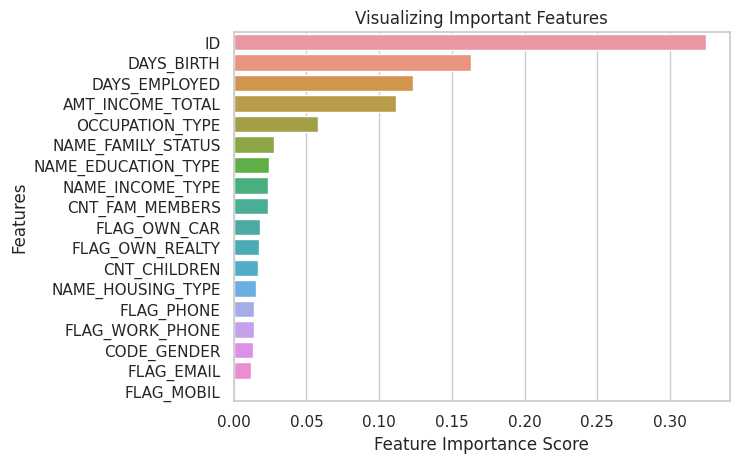

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

**LOGISTIC REGRESSION**

In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
X = df1.drop(['STATUS'], axis=1)

y = df1['STATUS']
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.42


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    0     0     0     0     0     0     0 47802]
 [    0     0     0     0     0     0     0  1284]
 [    0     0     0     0     0     0     0    99]
 [    0     0     0     0     0     0     0    32]
 [    0     0     0     0     0     0     0    24]
 [    0     0     0     0     0     0     0   162]
 [    0     0     0     0     0     0     0 26901]
 [    0     0     0     0     0     0     0 55264]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     47802
           1       0.00      0.00      0.00      1284
           2       0.00      0.00      0.00        99
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00       162
           6       0.00      0.00      0.00     26901
           7       0.42      1.00      0.59     55264

    accuracy                           0.42    131568
   macro avg       0.05      0.12      0.07    131568
weighted avg       0.18      0.42      0.25    131568



**K MEANS**

In [ ]:
X = df1.drop(['STATUS'], axis=1)

y = df1['STATUS']

In [ ]:
X.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2,0.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1,1.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1,1.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0


In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,0.000000e+00,0.0,0.059697,0.745032,0.033934,0.0,1.0,0.0,0.0,0.052632,0.0,1.0,1.0,0.00,0.75,0.00,0.0,0.000000
1,3.343198e-07,0.0,0.059697,0.745032,0.033934,0.0,1.0,0.0,0.0,0.052632,0.0,1.0,1.0,0.00,0.75,0.00,0.0,0.000000
2,6.686396e-07,0.0,0.012850,0.210422,0.042837,0.0,0.0,0.0,0.0,0.052632,0.0,1.0,1.0,0.00,1.00,0.25,0.2,0.055556
3,1.337279e-06,0.0,0.036274,0.343891,0.037829,0.0,0.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.25,1.00,0.50,0.2,0.111111
4,1.671599e-06,0.0,0.036274,0.343891,0.037829,0.0,0.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.25,1.00,0.50,0.2,0.111111


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[0.33029085, 0.02267522, 0.02181456, 0.56876934, 0.0830814 ,
        0.        , 0.5419793 , 0.61351841, 0.08744451, 0.06265776,
        0.86254924, 0.1615785 , 0.3650816 , 0.15276801, 0.90125563,
        0.32090993, 0.24060214, 0.26340387],
       [0.34319148, 0.01398216, 0.02098719, 0.37915979, 0.47906896,
        0.        , 0.00155673, 0.11721633, 0.097404  , 0.05077328,
        0.96182397, 0.05737575, 0.91987143, 0.32053592, 0.92373984,
        0.37344687, 0.21601274, 0.15317977],
       [0.34156481, 0.0292317 , 0.02807861, 0.59637109, 0.07200089,
        0.        , 0.12127242, 0.18296181, 0.13238606, 0.07278557,
        0.29458109, 0.78239973, 0.75485421, 0.15170108, 0.89598571,
        0.28994798, 0.23446506, 0.23683901]])

In [ ]:
kmeans.inertia_

506993.01424826024

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 48593 out of 438557 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.11


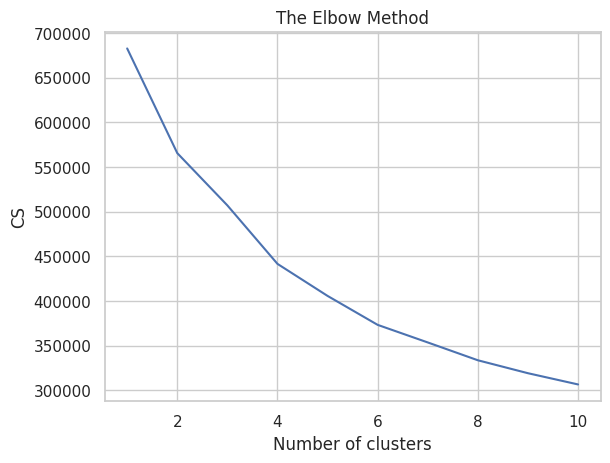

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 26815 out of 438557 samples were correctly labeled.
Accuracy score: 0.06


**TIME COMPARSION**

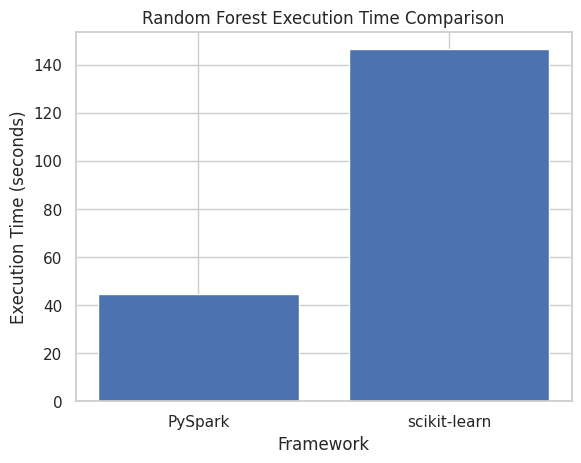

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForest
from datetime import datetime
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("RandomForestComparison").getOrCreate()


# Prepare the data for PySpark's Random Forest
# Prepare the data for PySpark's Logistic Regression
df=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1']
assembler = VectorAssembler(inputCols=df, outputCol="feature")
df = assembler.transform(indexed_df)

# Create the PySpark Random Forest classifier
train, test = df.randomSplit([0.8, 0.2], seed = 2000)
rf = RandomForestClassifier(featuresCol = 'feature', labelCol = 'STATUS')
# Train the PySpark Random Forest and measure the execution time
start_time_pyspark = datetime.now()
rfModel = rf.fit(train)
end_time_pyspark = datetime.now()
execution_time_pyspark = (end_time_pyspark - start_time_pyspark).total_seconds()

# Create the scikit-learn Random Forest classifier

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2000)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the scikit-learn Random Forest and measure the execution time
start_time_sklearn = datetime.now()
model = clf.fit(X_train,y_train)
end_time_sklearn = datetime.now()
execution_time_sklearn = (end_time_sklearn - start_time_sklearn).total_seconds()

# Plot the execution times
labels = ['PySpark', 'scikit-learn']
execution_times = [execution_time_pyspark, execution_time_sklearn]

plt.bar(labels, execution_times)
plt.xlabel('Framework')
plt.ylabel('Execution Time (seconds)')
plt.title('Random Forest Execution Time Comparison')
plt.show()

# Stop the SparkSession
spark.stop()





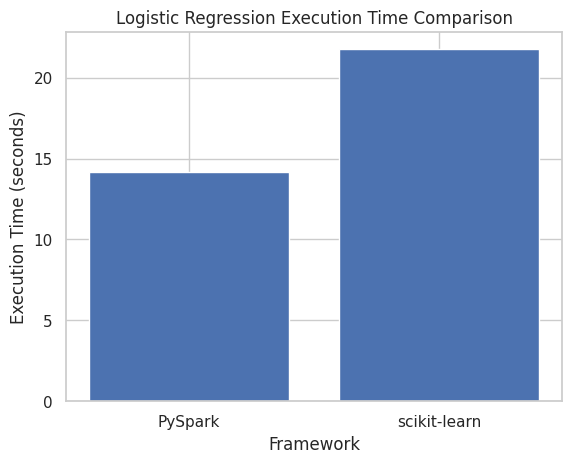

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from datetime import datetime
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("LogisticRegressionComparison").getOrCreate()

# Prepare the data for PySpark's Logistic Regression
df=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1']
assembler = VectorAssembler(inputCols=df, outputCol="features")
df = assembler.transform(indexed_df)

# Convert the PySpark DataFrame to Pandas DataFrame for scikit-learn
train, test = df.randomSplit([0.8, 0.2], seed = 2018)
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'STATUS', maxIter=5)

# # Train the PySpark Logistic Regression and measure the execution time
start_time_pyspark = datetime.now()
lrModel = lr.fit(train)
end_time_pyspark = datetime.now()
execution_time_pyspark = (end_time_pyspark - start_time_pyspark).total_seconds()

# Create the scikit-learn Logistic Regression classifier
X = df1.drop(['STATUS'], axis=1)

y = df1['STATUS']
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
logreg = LogisticRegression()

# Train the scikit-learn Logistic Regression and measure the execution time
start_time_sklearn = datetime.now()
model = logreg.fit(X_train, y_train)
end_time_sklearn = datetime.now()
execution_time_sklearn = (end_time_sklearn - start_time_sklearn).total_seconds()

# Plot the execution times
labels = ['PySpark', 'scikit-learn']
execution_times = [execution_time_pyspark, execution_time_sklearn]

plt.bar(labels, execution_times)
plt.xlabel('Framework')
plt.ylabel('Execution Time (seconds)')
plt.title('Logistic Regression Execution Time Comparison')
plt.show()

# Stop the SparkSession
spark.stop()


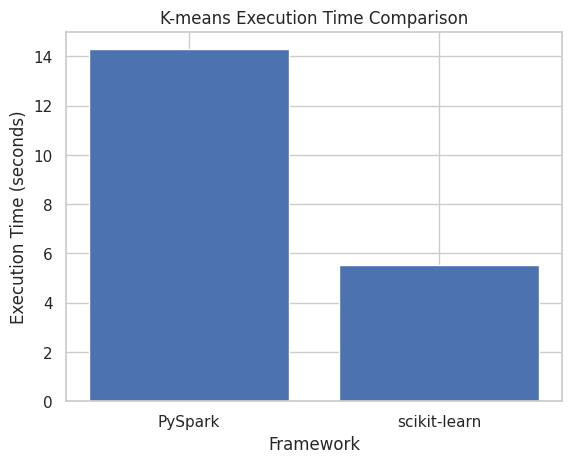

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from sklearn.cluster import KMeans as SklearnKMeans
from datetime import datetime
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder.appName("KMeansComparison").getOrCreate()

# Prepare the data for PySpark's K-means
featureassembler=VectorAssembler(inputCols=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'STATUS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1'],outputCol="Features")
output=featureassembler.transform(indexed_df)

# Create the PySpark K-means model
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol = "Features" , k=3)

# Train the PySpark K-means model and measure the execution time
start_time_pyspark = datetime.now()
model = kmeans.fit(output)
end_time_pyspark = datetime.now()
execution_time_pyspark = (end_time_pyspark - start_time_pyspark).total_seconds()

# Create the scikit-learn K-means model
from sklearn.cluster import KMeans
X = df1.drop(['STATUS'], axis=1)

y = df1['STATUS']
kmeans = KMeans(n_clusters=3, random_state=0)



# Train the scikit-learn K-means model and measure the execution time
start_time_sklearn = datetime.now()
kmeans.fit(X)
end_time_sklearn = datetime.now()
execution_time_sklearn = (end_time_sklearn - start_time_sklearn).total_seconds()

# Plot the execution times
labels = ['PySpark', 'scikit-learn']
execution_times = [execution_time_pyspark, execution_time_sklearn]

plt.bar(labels, execution_times)
plt.xlabel('Framework')
plt.ylabel('Execution Time (seconds)')
plt.title('K-means Execution Time Comparison')
plt.show()

# Stop the SparkSession
spark.stop()


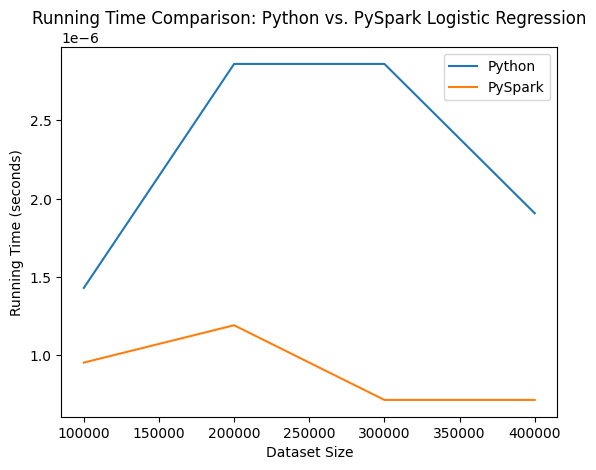

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

# Create a SparkSession
spark = SparkSession.builder.appName("LogisticRegressionComparison").getOrCreate()

# Initialize lists for dataset sizes and corresponding running times
dataset_sizes = [100000, 200000, 300000, 400000]
python_times = []
pyspark_times = []

# Loop over dataset sizes
for size in dataset_sizes:
    # Upload the CSV file using pandas
    start_time = time.time()
    # Replace 'your_dataset.csv' with the actual file path of your CSV file
    dataset = df1
    python_time = time.time() - start_time
    python_times.append(python_time)

    # Upload the CSV file using PySpark
    start_time = time.time()
    # Replace 'your_dataset.csv' with the actual file path of your CSV file
    spark_dataset = indexed_df
    pyspark_time = time.time() - start_time
    pyspark_times.append(pyspark_time)

    X = df1.drop(['STATUS'], axis=1)

    y = df1['STATUS']
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
    logreg = LogisticRegression()
    model = logreg.fit(X_train, y_train)
    df=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1']
assembler = VectorAssembler(inputCols=df, outputCol="features")
df = assembler.transform(indexed_df)

# Convert the PySpark DataFrame to Pandas DataFrame for scikit-learn
train, test = df.randomSplit([0.8, 0.2], seed = 2018)
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'STATUS', maxIter=5)
lrModel = lr.fit(train)




# Plot the running times
plt.plot(dataset_sizes, python_times, label="Python")
plt.plot(dataset_sizes, pyspark_times, label="PySpark")
plt.xlabel("Dataset Size")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time Comparison: Python vs. PySpark Logistic Regression")
plt.legend()
plt.show()

# Stop the SparkSession
spark.stop()

**Random Forest Time Comparsion**

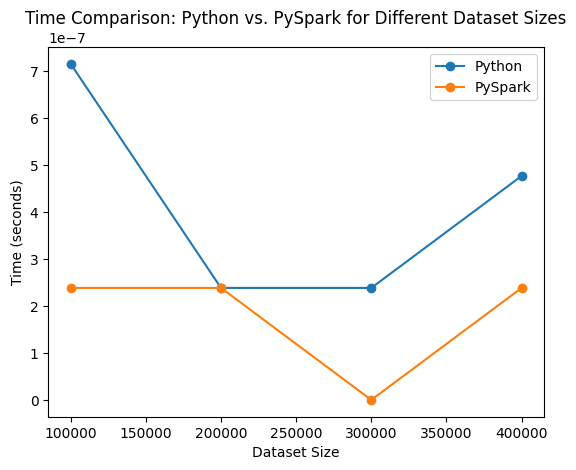

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

# Create a SparkSession
spark = SparkSession.builder.appName("RandomForestComparison").getOrCreate()

# Initialize lists for dataset sizes and corresponding running times
dataset_sizes = [100000, 200000, 300000, 400000]
python_times = []
pyspark_times = []

# Loop over dataset sizes
for size in dataset_sizes:
   # Upload the CSV file using pandas
    start_time = time.time()
    # Replace 'your_dataset.csv' with the actual file path of your CSV file
    dataset = df1
    python_time = time.time() - start_time
    python_times.append(python_time)

    # Upload the CSV file using PySpark
    start_time = time.time()
    # Replace 'your_dataset.csv' with the actual file path of your CSV file
    spark_dataset = indexed_df
    pyspark_time = time.time() - start_time
    pyspark_times.append(pyspark_time)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2000)
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, random_state=0)

    # Train the scikit-learn Random Forest and measure the execution time
    model = clf.fit(X_train,y_train)
    df=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1']
assembler = VectorAssembler(inputCols=df, outputCol="features")
df = assembler.transform(indexed_df)

#Create the PySpark Random Forest classifier
train, test = df.randomSplit([0.8, 0.2], seed = 2000)
rf = RandomForestClassifier(featuresCol = "features", labelCol = 'STATUS')
# Train the PySpark Random Forest and measure the execution time

rfModel = rf.fit(train)

# Create the scikit-learn Random Forest classifier





# Plot the running times
plt.plot(dataset_sizes, python_times, label="Python")
plt.plot(dataset_sizes, pyspark_times, label="PySpark")
plt.xlabel("Dataset Size")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.show()

# Stop the SparkSession
spark.stop()

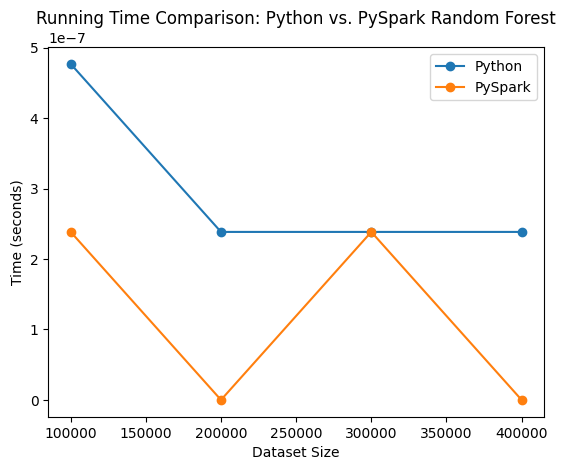

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

# Create a SparkSession
spark = SparkSession.builder.appName("RandomForestComparison").getOrCreate()

# Initialize lists for dataset sizes and corresponding running times
dataset_sizes = [100000, 200000, 300000, 400000]
python_times = []
pyspark_times = []

# Loop over dataset sizes
for size in dataset_sizes:
   # Upload the CSV file using pandas
    start_time = time.time()
    # Replace 'your_dataset.csv' with the actual file path of your CSV file
    dataset = df1
    python_time = time.time() - start_time
    python_times.append(python_time)

    # Upload the CSV file using PySpark
    start_time = time.time()
    # Replace 'your_dataset.csv' with the actual file path of your CSV file
    spark_dataset = indexed_df
    pyspark_time = time.time() - start_time
    pyspark_times.append(pyspark_time)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2000)
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, random_state=0)

    # Train the scikit-learn Random Forest and measure the execution time
    model = clf.fit(X_train,y_train)
    df=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1']
assembler = VectorAssembler(inputCols=df, outputCol="features")
df = assembler.transform(indexed_df)

#Create the PySpark Random Forest classifier
train, test = df.randomSplit([0.8, 0.2], seed = 2000)
rf = RandomForestClassifier(featuresCol = "features", labelCol = 'STATUS')
# Train the PySpark Random Forest and measure the execution time

rfModel = rf.fit(train)

# Create the scikit-learn Random Forest classifier





# Plot the running times
plt.plot(dataset_sizes, python_times, label="Python")
plt.plot(dataset_sizes, pyspark_times, label="PySpark")
plt.title("Running Time Comparison: Python vs. PySpark Logistic Regression")
plt.xlabel("Dataset Size")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.show()

# Stop the SparkSession
spark.stop()

**K means comparison**

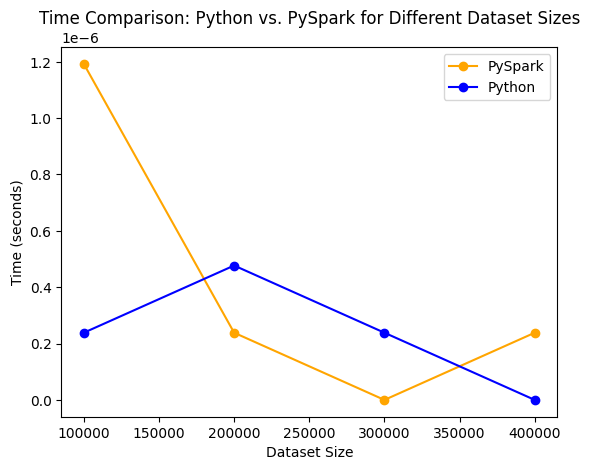

In [ ]:
import time
import matplotlib.pyplot as plt

# Initialize dataset sizes and time comparison lists
dataset_sizes = [100000, 200000, 300000, 400000]
python_times = []
pyspark_times = []

# Loop over dataset sizes
for size in dataset_sizes:
    featureassembler=VectorAssembler(inputCols=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'STATUS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1'],outputCol="Features")
output=featureassembler.transform(indexed_df)

# Create the PySpark K-means model
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol = "Features" , k=3)


model = kmeans.fit(output)

# Create the scikit-learn K-means model
from sklearn.cluster import KMeans
X = df1.drop(['STATUS'], axis=1)

y = df1['STATUS']
kmeans = KMeans(n_clusters=3, random_state=0)



# Train the scikit-learn K-means model and measure the execution time
kmeans.fit(X)

# Plot the time comparison graph
plt.plot(dataset_sizes, python_times, marker='o', label='PySpark',color = 'orange' )
plt.plot(dataset_sizes, pyspark_times, marker='o', label='Python',color = 'blue')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

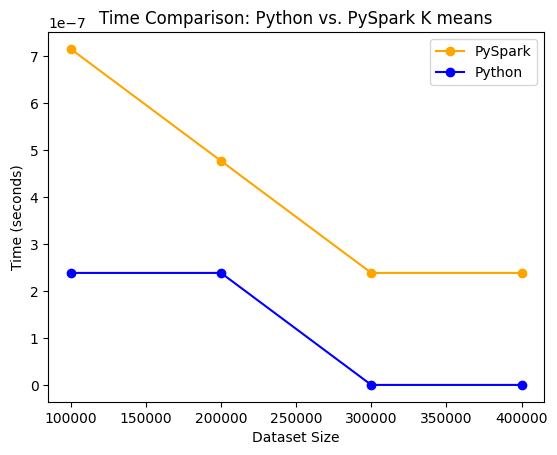

In [ ]:
import time
import matplotlib.pyplot as plt

# Initialize dataset sizes and time comparison lists
dataset_sizes = [100000, 200000, 300000, 400000]
python_times = []
pyspark_times = []

# Loop over dataset sizes
for size in dataset_sizes:
    featureassembler=VectorAssembler(inputCols=['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'STATUS',
 'CODE_GENDER1',
 'FLAG_OWN_CAR1',
 'FLAG_OWN_REALTY1',
 'CNT_CHILDREN1',
 'NAME_INCOME_TYPE1',
 'NAME_EDUCATION_TYPE1',
 'NAME_FAMILY_STATUS1',
 'NAME_HOUSING_TYPE1'],outputCol="Features")
output=featureassembler.transform(indexed_df)

# Create the PySpark K-means model
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol = "Features" , k=3)


model = kmeans.fit(output)

# Create the scikit-learn K-means model
from sklearn.cluster import KMeans
X = df1.drop(['STATUS'], axis=1)

y = df1['STATUS']
kmeans = KMeans(n_clusters=3, random_state=0)



# Train the scikit-learn K-means model and measure the execution time
kmeans.fit(X)

# Plot the time comparison graph
plt.plot(dataset_sizes, python_times, marker='o', label='PySpark',color = 'orange' )
plt.plot(dataset_sizes, pyspark_times, marker='o', label='Python',color = 'blue')
plt.title("Running Time Comparison: Python vs. PySpark K means")
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()